In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import os
import csv
from collections import defaultdict
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import txt file

with open('20th_century_article_Wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

Question 4: Tokenize the words from the text and create a bar chart to plot the 10 most common words.

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)

In [5]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4923 samples and 22452 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1614),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 411),
 ('to', 333),
 ('The', 330),
 ('[', 309),
 (']', 309),
 ('in', 304)]

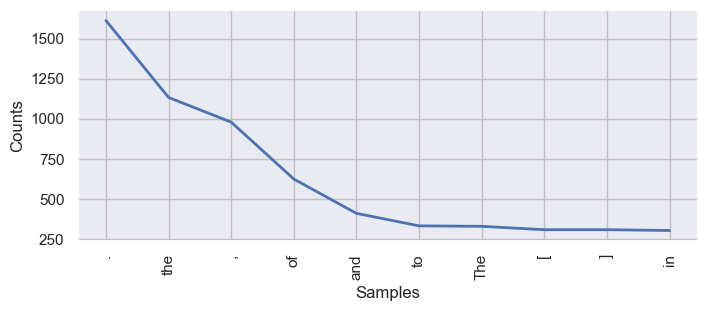

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

Question 5: Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [8]:
# Removing stopwords in words
from nltk.corpus import stopwords

filtered_words = [] # creates an empty list
stop_words = set(stopwords.words('english')) 
for word in tokenized_word:
      if word not in stop_words:
           filtered_words.append(word)

In [9]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 4820 samples and 17663 outcomes>


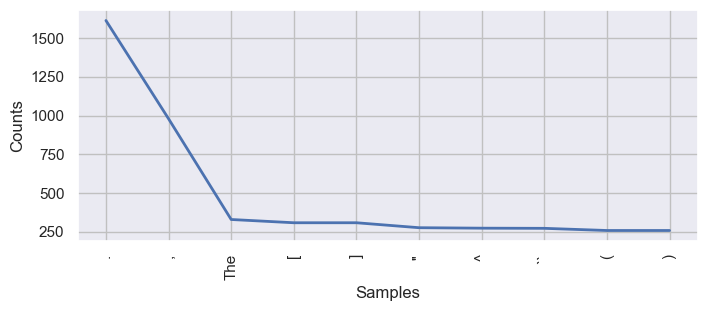

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10,cumulative = False)
plt.show()

In [11]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [12]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)

In [13]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 

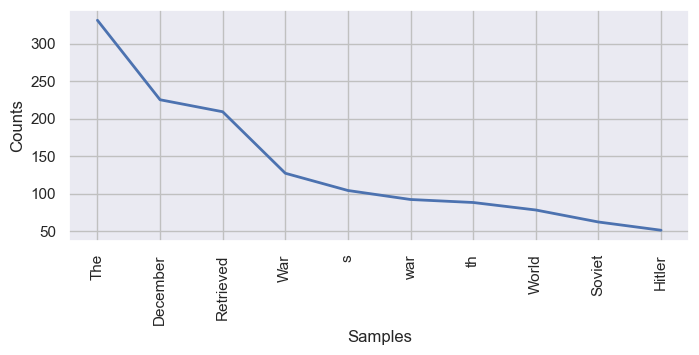

In [14]:
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10,cumulative = False)
plt.show()

Answer to question 5: December is the most frequently used word after the word 'The'. Doing an analysis of what time of year key events of the 20th century take place should yield interestinng results.

Question 6: Create a tags list using TextBlob. 

In [15]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'th', 'In', 'edit']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [16]:
%time text = TextBlob(str(filtered))

Wall time: 8.84 ms


In [17]:
tags_list = text.tags

Question 7: Create a list of the Top 10 POS tags for words that appear in the article. 

In [18]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

In [19]:
top10

,Word type,Words
13,POS,6933
11,NNP,5607
12,NNS,1070
16,VBD,867
10,NN,394
17,VBG,325
6,JJ,294
5,IN,157
15,RB,147
20,VBZ,79


Question 8: Plot this list in a bar chart using the seaborn library. Note: If you were with us for the Data Immersion Program, you’ve already learned about seaborn in Achievement 4. If Seaborn is new to you, use this introductory resource to walk you through it.

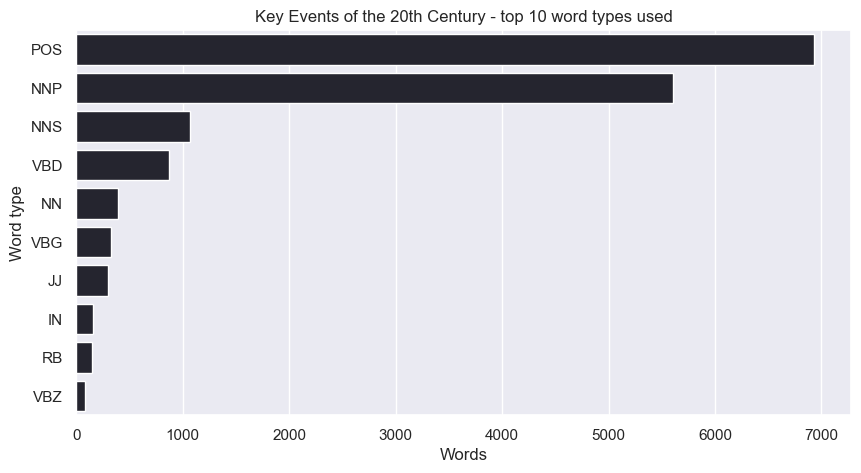

In [20]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10).set_title("Key Events of the 20th Century - top 10 word types used")

Question 9: Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.

In [21]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurrences_noun"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences_noun'], ascending=False)
top15n = y.nlargest(15, 'Occurrences_noun') 

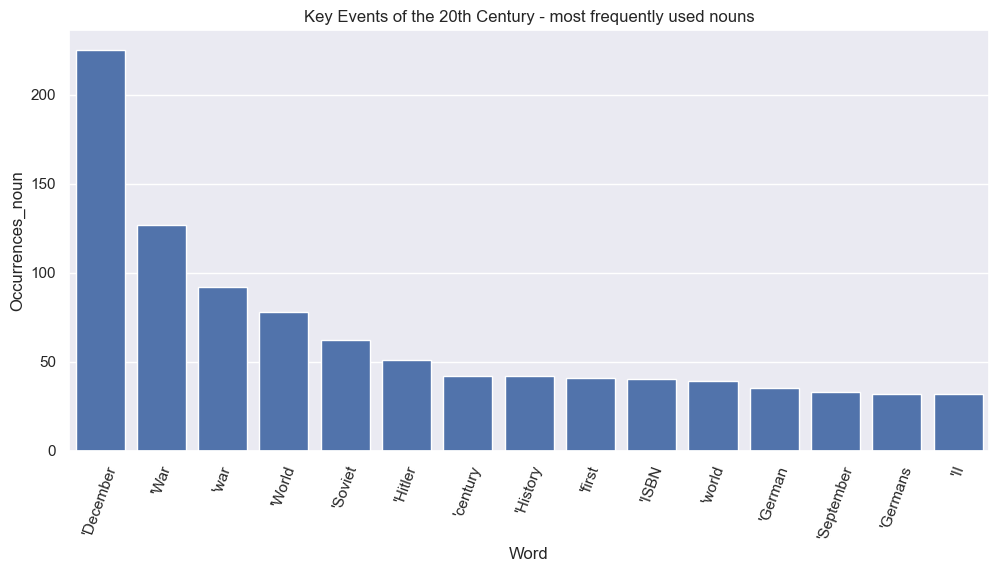

In [22]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.tight_layout()
with sns.dark_palette("xkcd:blue", 15):
      sns.barplot(x="Word", y="Occurrences_noun",
      saturation=0.9, data = top15n).set_title("Key Events of the 20th Century - most frequently used nouns")

In [23]:
df = df_text[(df_text['Word type'] == "VB") | (df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBG")]
df.columns = ["Word", "Occurrences_verb"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences_verb'], ascending=False)
top15v = y.nlargest(15, 'Occurrences_verb') 

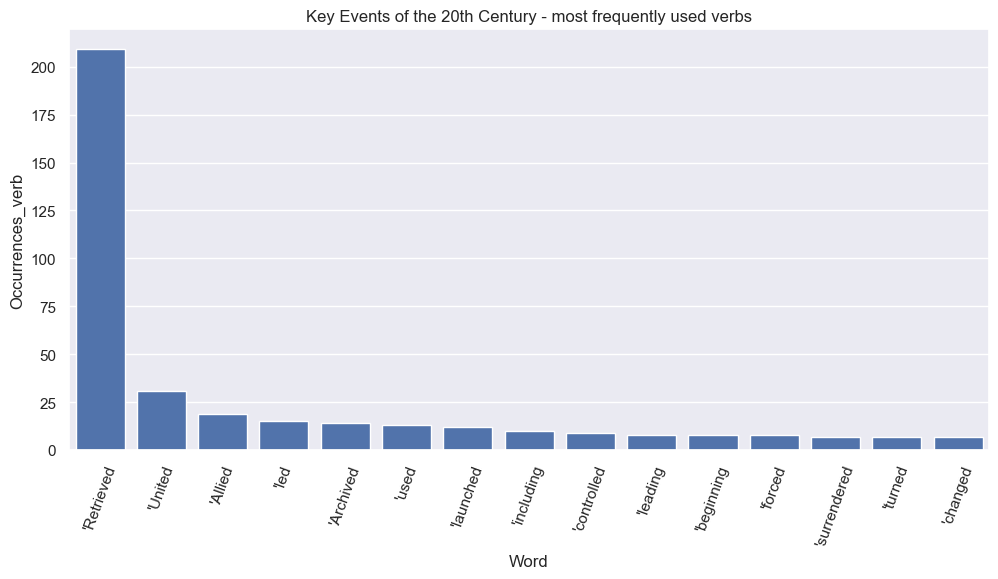

In [24]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.tight_layout()
with sns.color_palette("crest", 15):
      sns.barplot(x="Word", y="Occurrences_verb",
      saturation=0.9, data = top15v).set_title("Key Events of the 20th Century - most frequently used verbs")

In [25]:
df = df_text[(df_text['Word type'] == "JJ") | (df_text['Word type'] == "JJR") | (df_text['Word type'] == "JJS")]
df.columns = ["Word", "Occurrences_adj"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences_adj'], ascending=False)
top15a = y.nlargest(15, 'Occurrences_adj') 

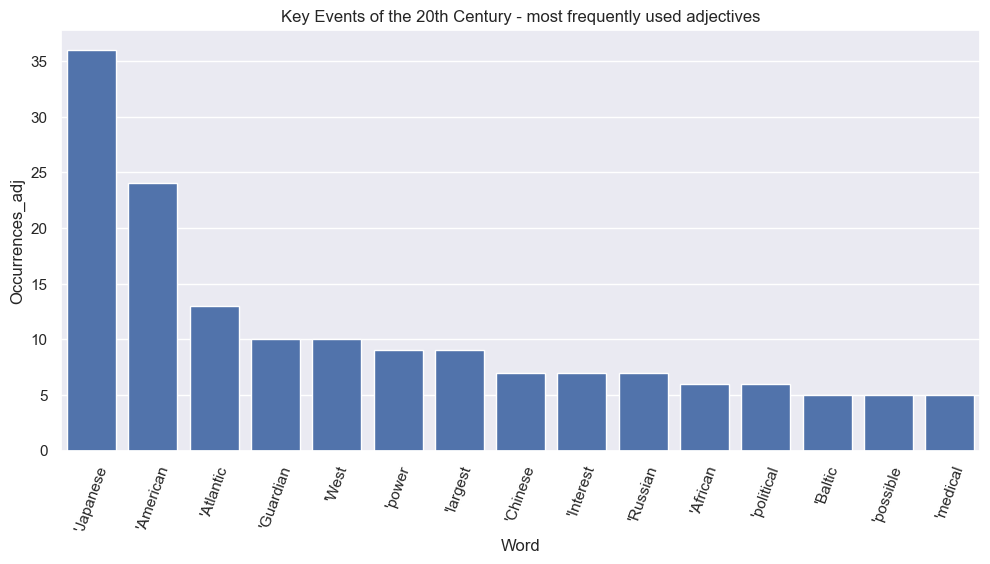

In [26]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=70)
plt.tight_layout()
with sns.dark_palette("red", 15):
      sns.barplot(x="Word", y="Occurrences_adj",
      saturation=0.9, data = top15a).set_title("Key Events of the 20th Century - most frequently used adjectives")

Answer to question 9: Need to filter for capitalization next time. Other then that, the adjectives are mostly place descriptors like 'Japanese' and 'retrieved' is the most used verb by a significant factor at over 200 compared to the next highest 'united'.

Question 10: Create a dataframe with the countries and the number of times they’re mentioned in your text (remember—you’ll need to use the countries lookup list if you didn’t scrape one in the previous task).

In [27]:
csv_filepath = r"C:\Users\stefa\20th-century\countries_list_20th_century_1.5.csv"
key_column_name = 'country_name'
txt_filepath = r'20th_century_article_Wiki.txt'

In [28]:
df = pd.read_csv(csv_filepath)

In [29]:
df

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [30]:
df_new = df.drop('Unnamed: 0', axis=1)
print(df_new)

                             country_name
0                            Afghanistan 
1                                Albania 
2                                Algeria 
3                                Andorra 
4                                 Angola 
..                                    ...
204     Sahrawi Arab Democratic Republic 
205                           Somaliland 
206                        South Ossetia 
207                               Taiwan 
208                          Transnistria

[209 rows x 1 columns]


In [31]:
country_list = df['country_name'].tolist()
print(country_list)

[' Afghanistan ', '  Albania ', '  Algeria ', '  Andorra ', '  Angola ', '  Antigua and Barbuda ', '  Argentina ', '  Armenia ', '  Australia ', '  Austria ', '  Azerbaijan', ' Bahamas, The ', '  Bahrain ', '  Bangladesh ', '  Barbados ', '  Belarus ', '  Belgium ', '  Belize ', '  Benin ', '  Bhutan ', '  Bolivia ', '  Bosnia and Herzegovina ', '  Botswana ', '  Brazil ', '  Brunei ', '  Bulgaria ', '  Burkina Faso ', '  Burundi', ' Cambodia ', '  Cameroon ', '  Canada ', '  Cape Verde ', '  Central African Republic ', '  Chad ', '  Chile ', "  China, People's Republic of ", '  Colombia ', '  Comoros ', '  Congo, Democratic Republic of the ', '  Congo, Republic of the ', '  Costa Rica ', '  Croatia ', '  Cuba ', '  Cyprus ', '  Czech Republic', '  Denmark ', '   Djibouti ', '   Dominica ', '   Dominican Republic', '  East Timor ', '   Ecuador ', '   Egypt ', '   El Salvador ', '   Equatorial Guinea ', '   Eritrea ', '   Estonia ', '   Eswatini ', '   Ethiopia', '  Fiji ', '   Finland 

In [32]:
country_cleaned_list = [item.strip() for item in country_list] 
#country_cleaned_list

In [33]:
print(country_cleaned_list)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo, Democratic Republic of the', 'Congo, Republic of the', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea', 'Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',

In [34]:
twentith_century_list = data.split()
#print(twentith_century_list)

In [35]:
filtered_list = [item for item in twentith_century_list if item in country_cleaned_list]
print(filtered_list)

['Panama', 'Russia', 'Russia', 'Germany', 'Germany', 'Italy', 'Germany', 'Germany', 'Germany', 'Germany', 'Austria', 'Austria', 'Spain', 'France', 'Poland', 'Poland', 'Germany', 'Germany', 'Denmark', 'Norway', 'Norway', 'Denmark', 'Sweden', 'Germany', 'Belgium', 'France', 'Greece', 'Albania', 'Greece', 'Ukraine', 'Libya', 'Iraq', 'Japan', 'Germany', 'Japan', 'Germany', 'Italy', 'Germany', 'Morocco', 'Algeria', 'Italy', 'Italy', 'Italy', 'France', 'Netherlands', 'Germany', 'Poland', 'Germany', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Germany', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Guinea', 'Japan', 'Japan', 'India', 'Japan', 'Japan', 'Japan', 'Japan', 'Germany', 'Germany', 'Russia', 'Israel', 'Israel', 'Libya', 'Iran', 'Japan', 'India', 'India', 'Bangladesh', 'Cambodia', 'Kenya', 'Ghana', 'Seychelles', 'Mozambique', 'Bangladesh', 'Poland', 'Latvia', 'Estonia', 'Lithuania', 'Finland', 'Romania', 'Hungary', 'Germany', 'Cuba', 'Vietnam', 'Vietnam', 'Vietnam', 'Cambodi

In [36]:
country_counts = {}

for item in filtered_list:
    if item in country_counts:
        country_counts[item] += 1
    else:
        country_counts[item] = 1

print(country_counts)

{'Panama': 1, 'Russia': 4, 'Germany': 21, 'Italy': 5, 'Austria': 2, 'Spain': 1, 'France': 5, 'Poland': 4, 'Denmark': 3, 'Norway': 3, 'Sweden': 1, 'Belgium': 1, 'Greece': 3, 'Albania': 1, 'Ukraine': 1, 'Libya': 3, 'Iraq': 1, 'Japan': 23, 'Morocco': 1, 'Algeria': 1, 'Netherlands': 1, 'Guinea': 1, 'India': 6, 'Israel': 3, 'Iran': 2, 'Bangladesh': 2, 'Cambodia': 2, 'Kenya': 1, 'Ghana': 1, 'Seychelles': 1, 'Mozambique': 1, 'Latvia': 1, 'Estonia': 1, 'Lithuania': 1, 'Finland': 2, 'Romania': 1, 'Hungary': 1, 'Cuba': 1, 'Vietnam': 8, 'Pakistan': 1}


In [37]:
country_mentions_df = pd.DataFrame(list(country_counts.items()), columns=['Countries', 'Mentions'])

In [38]:
country_mentions_df

,Countries,Mentions
0,Panama,1
1,Russia,4
2,Germany,21
3,Italy,5
4,Austria,2
5,Spain,1
6,France,5
7,Poland,4
8,Denmark,3
9,Norway,3


In [39]:
country_mentions_df_sorted = country_mentions_df.sort_values(by='Mentions', ascending=False)

In [40]:
country_mentions_df_sorted

,Countries,Mentions
17,Japan,23
2,Germany,21
38,Vietnam,8
22,India,6
3,Italy,5
6,France,5
7,Poland,4
1,Russia,4
9,Norway,3
23,Israel,3


Question 11: Create a plot showing the frequency of the number of times these countries are mentioned in the text. Is there anything in particular you notice in this plot? Describe your findings in a Markdown cell underneath the plot. 

C:\Users\stefa\AppData\Local\Temp\ipykernel_1032\4038231901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Countries', y ='Mentions', data=country_mentions_df_sorted, width = 0.5, palette = 'crest')


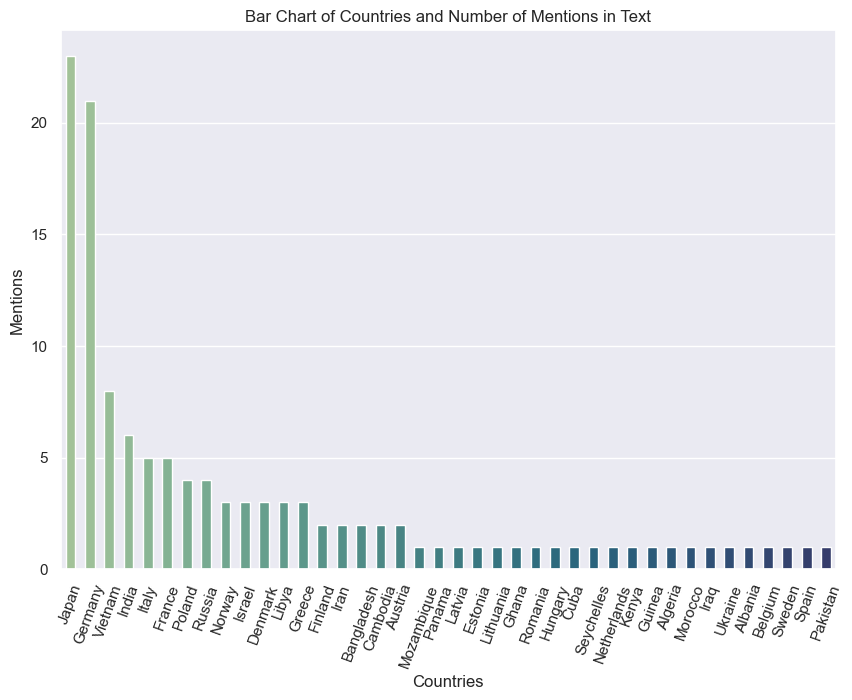

In [41]:
plt.figure(figsize=(10, 7))
sns.barplot(x ='Countries', y ='Mentions', data=country_mentions_df_sorted, width = 0.5, palette = 'crest')
plt.title('Bar Chart of Countries and Number of Mentions in Text')
plt.xticks(rotation=70)
plt.xlabel('Countries')
plt.ylabel('Mentions')
plt.show()

Answer to question 11: There is no mention of the US, despite it being pivotal in the Vietnam war and the Cold War, two noteable conflicts of the 20th century. Was the scrape incorrect? Doesn't seem like it, since American is one of the highest adjectives in the frequency charts. It is something to keep in mind.